In [130]:
%matplotlib inline
# TensorFlow and tf.keras
import collections
import tensorflow as tf
from time import time
from collections import Counter
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
plt.interactive(False)
print(tf.__version__)


print("imported...")


'''
This program uses CNN model to train the image data. 
1. It loads the labless.xls file and imports images (3d, RGB ) & classes
2. resize the images to a particular width and height
3. This model showed better accuracy than, ANN. 
4. The image loading is manual and tedious. 
5. USe LeNet CNN model instead. 

'''


1.12.0
imported...


In [114]:
df=pd.read_excel('Lables.xlsx')
print("file loaded")

fan= df["Fan"]
major= df["Major"]
minor=df["Minor"]
good=df["Good"]
other=df["Other"]
name=df["Photo Name"]


### create the train lables (0-good,1-minor,2-major, 3-other, 4-fan)
class_names=[ "good","minor", "major","other"]
num_images=name.size
lables=[]

##TODO: The fan class can be =4, when we will do multi lableing. 
for i in range(num_images):
    lables.insert(i, 3) #by default other.
    if(good[i]==1):
        lables.insert(i,0)
    elif(minor[i]==1):
        lables.insert(i,1)
    elif(major[i]==1):
        lables.insert(i,2)
print("images labled...")

file loaded
images labled...


In [115]:
## load the image data in the memory
#img_path="C:\\Users\212628414\Desktop\Rotation3\demo_codes\image_processing\";
img_data=[]
num_images=num_images-200
for i in range(num_images):
    img= cv2.imread("C:\\Users\\212628414\\Desktop\\Rotation3\\demo_codes\\image_processing\\jupyter\\image_data\\"+name[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img_data.insert(i, gray)
    img_data.insert(i, img)
    
   # print("added...:"+str(name[i])+"->"+ str(gray.shape))
    print("added...:"+str(name[i])+"->"+ str(img.shape))
    
print("image data loaded.....")


added...:ABC1.jpg->(4032, 3024, 3)
added...:337898F6-683C-42D8-BB90-059668CAAAC5_BW.jpeg->(4032, 3024, 3)
added...:3AEC621C-354A-42C4-909E-5737795064AD_BW.jpeg->(4032, 3024, 3)
added...:6C7EF891-9714-43A2-A5E3-831B17C2A9B9_BW.jpeg->(4032, 3024, 3)
added...:7064D1C3-6496-442D-9CAF-CD4886189553_BW.jpeg->(4032, 3024, 3)
added...:975521CA-E150-48AE-8308-511D3CD23FAC_BW.jpeg->(3024, 4032, 3)
added...:9B4FD5A8-03C6-42AC-8BB2-47F26CA76C35_BW.jpeg->(4032, 3024, 3)
added...:AE68848B-5965-4770-8B1B-5694A7AF7A97_BW.jpeg->(4032, 3024, 3)
added...:BFF344B7-61EC-45F8-BF8F-72753CA2620F_BW.jpeg->(4032, 3024, 3)
added...:E5D4F837-D3B1-48D1-A234-FEC16ADB63AF_BW.jpeg->(4032, 3024, 3)
added...:EA7663D6-8BAD-4B41-88D1-5D19D3CC893D_BW.jpeg->(4032, 3024, 3)
added...:F59C47A3-AB93-4DF5-BFBA-EB70DAF43E10_BW.jpeg->(4032, 3024, 3)
added...:FB46976C-C819-477F-B8D6-699ADEC79E73_BW.jpeg->(4032, 3024, 3)
added...:IMG_0103_BW.JPG->(4032, 3024, 3)
added...:IMG_0104_BW.JPG->(4032, 3024, 3)
added...:IMG_0105_BW.JPG->(40

added...:IMG_0277_BW.JPG->(3024, 3024, 3)
added...:IMG_0278_BW.JPG->(3024, 3024, 3)
added...:IMG_0279_BW.JPG->(3024, 3024, 3)
added...:IMG_0280_BW.JPG->(3024, 3024, 3)
added...:IMG_0281_BW.JPG->(3024, 3024, 3)
added...:IMG_0282_BW.JPG->(3024, 3024, 3)
added...:IMG_0283_BW.JPG->(3024, 3024, 3)
added...:IMG_0284_BW.JPG->(3024, 3024, 3)
added...:IMG_0285_BW.JPG->(3024, 3024, 3)
added...:IMG_0286_BW.JPG->(3024, 3024, 3)
added...:IMG_0287_BW.JPG->(3024, 3024, 3)
added...:IMG_0288_BW.JPG->(3024, 3024, 3)
added...:IMG_0289_BW.JPG->(3024, 3024, 3)
added...:IMG_0290_BW.JPG->(3024, 3024, 3)
added...:IMG_0291_BW.JPG->(3024, 3024, 3)
added...:IMG_0292_BW.JPG->(3024, 3024, 3)
added...:IMG_0293_BW.JPG->(3024, 3024, 3)
added...:IMG_0294_BW.JPG->(3024, 3024, 3)
added...:IMG_0295_BW.JPG->(3024, 3024, 3)
added...:IMG_0296_BW.JPG->(3024, 3024, 3)
added...:IMG_0297_BW.JPG->(3024, 3024, 3)
added...:IMG_0298_BW.JPG->(3024, 3024, 3)
added...:IMG_0299_BW.JPG->(3024, 3024, 3)
added...:IMG_0300_BW.JPG->(3024, 3

added...:IMG_0473_BW.JPG->(3024, 3024, 3)
added...:IMG_0474_BW.JPG->(3024, 3024, 3)
added...:IMG_0475_BW.JPG->(3024, 3024, 3)
added...:IMG_0476_BW.JPG->(3024, 3024, 3)
added...:IMG_0477_BW.JPG->(3024, 3024, 3)
added...:IMG_0478_BW.JPG->(3024, 3024, 3)
added...:IMG_0479_BW.JPG->(3024, 3024, 3)
added...:IMG_0480_BW.JPG->(3024, 3024, 3)
added...:IMG_0481_BW.JPG->(3024, 3024, 3)
added...:IMG_0482_BW.JPG->(3024, 3024, 3)
added...:IMG_0483_BW.JPG->(3024, 3024, 3)
added...:IMG_0484_BW.JPG->(3024, 3024, 3)
added...:IMG_0485_BW.JPG->(3024, 3024, 3)
added...:IMG_0486_BW.JPG->(3024, 3024, 3)
added...:IMG_0487_BW.JPG->(3024, 3024, 3)
added...:IMG_0488_BW.JPG->(3024, 3024, 3)
added...:IMG_0489_BW.JPG->(3024, 3024, 3)
added...:IMG_0490_BW.JPG->(3024, 3024, 3)
added...:IMG_0491_BW.JPG->(3024, 3024, 3)
added...:IMG_0492_BW.JPG->(3024, 3024, 3)
added...:IMG_0493_BW.JPG->(3024, 3024, 3)
added...:IMG_0494_BW.JPG->(3024, 3024, 3)
added...:IMG_0495_BW.JPG->(3024, 3024, 3)
added...:IMG_0496_BW.JPG->(3024, 3

In [116]:
## convert the image data into ndArray and equal shapes by augmenting the data. 
height=500
width=500

data_list=[]
for i in range(num_images):
    tmp_img= img_data[i]
    tmp2_img= cv2.resize(img_data[i], (width,height)) 
    data_list.insert(i, tmp2_img)
data=np.asarray(data_list)
print("image data resized and stored.......")
data.shape
    

image data resized and stored.......


(568, 500, 500, 3)

In [117]:
##prepare the training testing and validation data
train_size=500
test_size=100
val_size=50
train_data=data[0:train_size,:,:]
test_data=data[train_size+1:train_size+test_size:,:]
val_data=data[train_size+test_size+1:train_size+test_size+val_size,:,:]

train_lables=lables[0:train_size]
test_lables=lables[train_size+1:train_size+test_size]
val_lables=lables[train_size+test_size+1:train_size+test_size+val_size]

print("train, test, val data prepared....")



train, test, val data prepared....


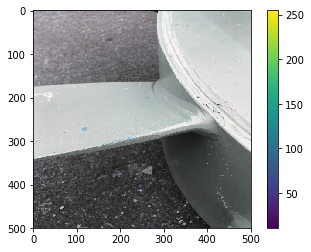

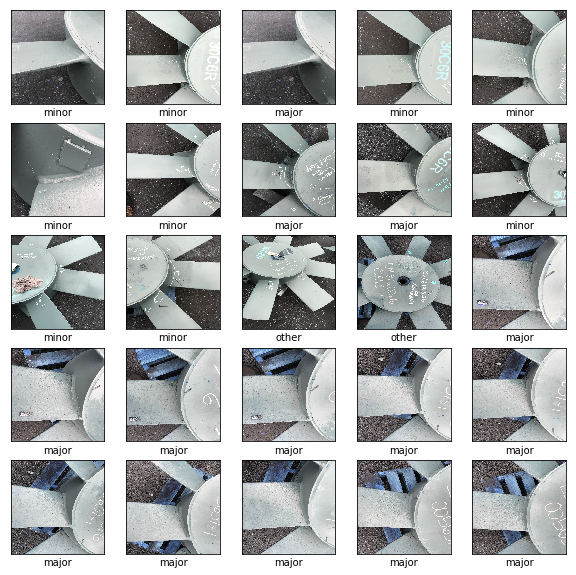

done...1


In [118]:
train_data = train_data
test_data = test_data

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])

plt.show()
print("done...1")

In [123]:

 
# img_width, img_height = 4000, 4000
img_width, img_height = width, height
batch_size = 32
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
# classes_num = 3
classes_num = 4
lr = 0.0004


model = keras.Sequential()
model.add(keras.layers.Convolution2D(nb_filters1, conv1_size, conv1_size, input_shape=(img_width, img_height,3)))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(keras.layers.Convolution2D(nb_filters2, conv2_size, conv2_size))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size) ))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])


#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(width, height)),
#    keras.layers.Dense(256, activation=tf.nn.relu),  
#    keras.layers.Dense(4, activation=tf.nn.softmax)
#])

#model.compile(optimizer=tf.train.AdamOptimizer(),
#              loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])
print("model Compiled..") 

model Compiled..


In [120]:
#N,4 shape train_lables
cnn_lables=[]

##TODO: The fan class can be =4, when we will do multi lableing. 
for i in range(num_images):
    if(good[i]==1):
        cnn_lables.insert(i,[1,0,0,0])
    elif(minor[i]==1):
        cnn_lables.insert(i,[0,1,0,0])
    elif(major[i]==1):
        cnn_lables.insert(i,[0,0,1,0])
    else:
        cnn_lables.insert(i, [0,0,0,1]) #by default other.
print("images labled...")
cnn_lables
myarray = np.asarray(cnn_lables)
myarray.shape

images labled...


(568, 4)

In [121]:
myarray[:500,:].shape

(500, 4)

In [134]:
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
model.fit(train_data, myarray[:500,:], epochs=15, callbacks=[tensorboard])
print("Model Trained...")

Epoch 1/15
500/500 [==============================] - 20s 40ms/step - loss: 9.5097 - acc: 0.4100
Epoch 2/15
500/500 [==============================] - 19s 39ms/step - loss: 9.5097 - acc: 0.4100
Epoch 3/15
500/500 [==============================] - 20s 40ms/step - loss: 9.5097 - acc: 0.4100
Epoch 4/15
500/500 [==============================] - 18s 37ms/step - loss: 9.5097 - acc: 0.4100
Epoch 5/15
500/500 [==============================] - 18s 35ms/step - loss: 9.5097 - acc: 0.4100
Epoch 6/15
500/500 [==============================] - 19s 38ms/step - loss: 9.5097 - acc: 0.4100
Epoch 7/15
500/500 [==============================] - 20s 40ms/step - loss: 9.5097 - acc: 0.4100
Epoch 8/15
500/500 [==============================] - 20s 40ms/step - loss: 9.5097 - acc: 0.4100
Epoch 9/15
500/500 [==============================] - 20s 41ms/step - loss: 9.5097 - acc: 0.4100
Epoch 10/15
500/500 [==============================] - 19s 37ms/step - loss: 9.5588 - acc: 0.4060
Epoch 11/15
500/500 [========

In [139]:
#eval=model.predict_classes(train_data,batch_size=10, verbose=1)
#print(eval)

counter=collections.Counter(train_lables)
counter


Counter({1: 205, 2: 184, 3: 86, 0: 25})